# SynthCheck:A Synthetic Image Identification Using Deep Learning

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler 
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG19
import numpy as np

C:\Users\vaibh\.conda\envs\tensorflow\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load image dataset
data = tf.keras.utils.image_dataset_from_directory(r"D:\## BE Sem II\Project stage II\Cifake Dataset\TRAIN", image_size=(32, 32))

Found 11138 files belonging to 2 classes.


0.0
255.0


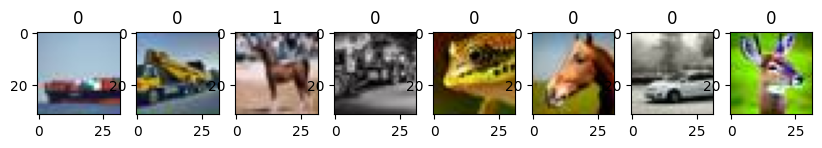

In [3]:
# Visualize a batch of images
data_it = data.as_numpy_iterator()
batch = data_it.next()

fig, ax = plt.subplots(ncols=8, figsize=(10, 10))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

print(batch[0].min())
print(batch[0].max())

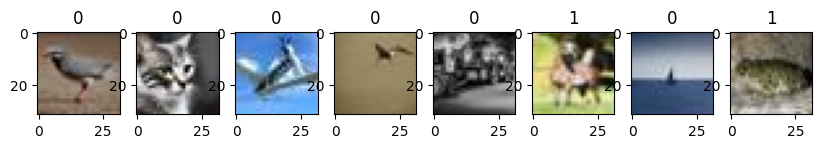

In [4]:
# Scale pixel values to the range [0, 1]
data = data.map(lambda x, y : (x/255, y))

# Visualize a scaled batch of images
scaled_it = data.as_numpy_iterator()
batch = scaled_it.next()

fig, ax = plt.subplots(ncols=8, figsize=(10, 10))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(float))
    ax[idx].title.set_text(batch[1][idx])


In [5]:
# Split the dataset
train_size = int(len(data) * 0.7)
cv_size = int(len(data) * 0.2)
test_size = int(len(data) * 0.1) + 1

train = data.take(train_size)
cv = data.skip(train_size).take(cv_size)
test = data.skip(train_size + cv_size).take(test_size)

print(len(train) + len(cv) + len(test))


348


In [6]:
# Define the CNN model with enhancements
model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
# Learning rate scheduler
initial_learning_rate = 0.001
def lr_scheduler(epoch, lr):
    return lr * 0.95  # Adjust the decay factor as needed
lr_schedule = LearningRateScheduler(lr_scheduler)
optimizer = Adam(learning_rate=initial_learning_rate)

In [8]:
# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
# Train the model
history = model.fit(data, validation_data=cv, epochs=10, callbacks=[lr_schedule])


Epoch 1/10
349/349 [==============================] - 68s 188ms/step - loss: 0.4591 - accuracy: 0.7904 - val_loss: 1.8350 - val_accuracy: 0.4361 - lr: 9.5000e-04
Epoch 2/10
349/349 [==============================] - 47s 134ms/step - loss: 0.3369 - accuracy: 0.8579 - val_loss: 0.8820 - val_accuracy: 0.6721 - lr: 9.0250e-04
Epoch 3/10
349/349 [==============================] - 47s 134ms/step - loss: 0.2645 - accuracy: 0.8917 - val_loss: 0.4853 - val_accuracy: 0.7803 - lr: 8.5737e-04
Epoch 4/10
349/349 [==============================] - 52s 148ms/step - loss: 0.2298 - accuracy: 0.9080 - val_loss: 0.2901 - val_accuracy: 0.8773 - lr: 8.1451e-04
Epoch 5/10
349/349 [==============================] - 55s 158ms/step - loss: 0.2255 - accuracy: 0.9118 - val_loss: 0.3201 - val_accuracy: 0.8723 - lr: 7.7378e-04
Epoch 6/10
349/349 [==============================] - 56s 159ms/step - loss: 0.1833 - accuracy: 0.9250 - val_loss: 0.3094 - val_accuracy: 0.8664 - lr: 7.3509e-04
Epoch 7/10
349/349 [========

In [10]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

35/35 [==============================] - 7s 49ms/step - loss: 0.1045 - accuracy: 0.9536
Test Accuracy: 95.36%


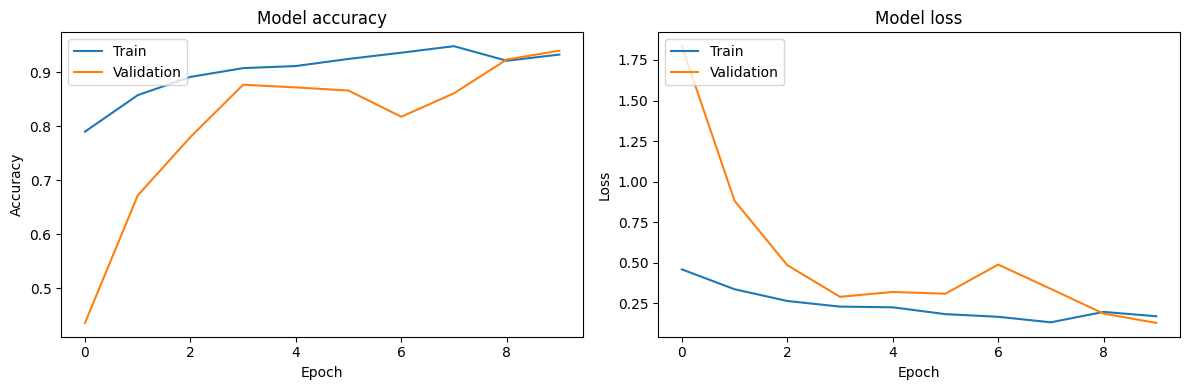

In [11]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()



In [12]:
from tensorflow.keras.metrics import Precision, Recall

pre = Precision()
rec = Recall()


for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    rec.update_state(y, yhat)
    

1/1 [==============================] - 0s 79ms/step


In [13]:
print(f'Precision: {pre.result().numpy()}, Recall: {rec.result().numpy()}')

Precision: 0.9075144529342651, Recall: 0.9957716464996338


In [14]:
from tensorflow.keras.models import load_model
from keras.models import load_model

# Assuming 'model' is your Keras model
model.save('model/ai_imageclassifier', save_format='tf')

loaded_model = tf.keras.models.load_model('model/ai_imageclassifier')

INFO:tensorflow:Assets written to: model/ai_imageclassifier\assets


INFO:tensorflow:Assets written to: model/ai_imageclassifier\assets


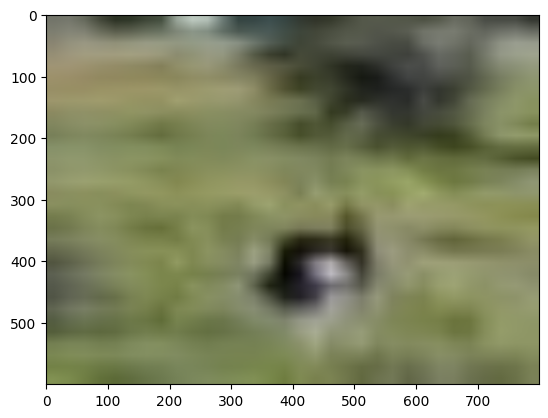

In [15]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = r"D:\## BE Sem II\Project stage II\Cifake Dataset\TEST\REAL\0492 (3).jpg"

try:
    img = cv2.imread(image_path)

    # Check if the image is loaded successfully
    if img is None:
        raise FileNotFoundError(f"Could not read the image from {image_path}")

    # Resize the image to a larger size
    img = cv2.resize(img, (800, 600))

    # Convert from BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the resized image
    plt.imshow(img)
    plt.show()

except Exception as e:
    print(f"Error: {e}")


In [16]:
import numpy as np

In [17]:
resize = tf.image.resize(img, (32, 32))

y_pred = model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 316ms/step


In [18]:
y_pred

array([[0.96879196]], dtype=float32)

In [19]:
if y_pred > 0.5: 
    print(f'Predicted class: REAL')
else:
    print(f'Predicted class: SYNTHETIC')

Predicted class: REAL


In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# ...

# Evaluate the model on the test set
y_true = []
y_pred_probs = []

for batch in test.as_numpy_iterator():
    X, y = batch
    y_true.extend(y)
    y_pred_probs.extend(model.predict(X).flatten())


1/1 [==============================] - 0s 80ms/step


In [21]:
# Convert probabilities to binary predictions
y_pred = np.array(y_pred_probs) > 0.5

In [22]:
# Confusion Matrix
conf_mat = confusion_matrix(y_true, y_pred)


In [23]:
# Classification Report
class_report = classification_report(y_true, y_pred, target_names=['SYNTHETIC', 'REAL'])

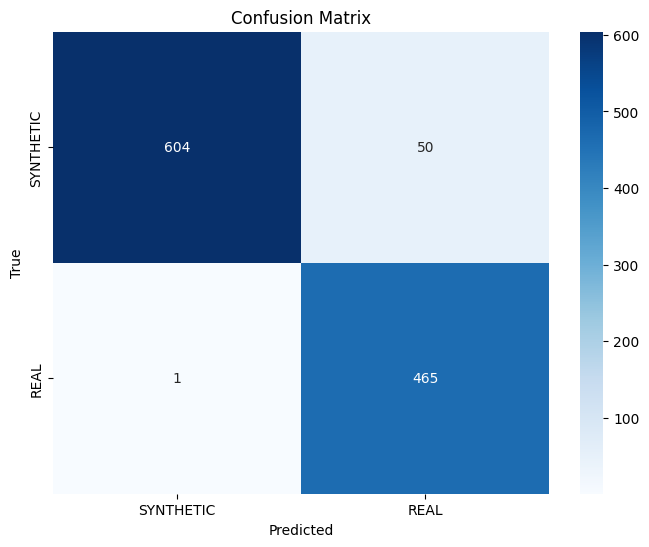

In [24]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['SYNTHETIC', 'REAL'], yticklabels=['SYNTHETIC', 'REAL'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [25]:
# Display Classification Report
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

   SYNTHETIC       1.00      0.92      0.96       654
        REAL       0.90      1.00      0.95       466

    accuracy                           0.95      1120
   macro avg       0.95      0.96      0.95      1120
weighted avg       0.96      0.95      0.95      1120



In [26]:
# Define a VGG19 model for image classification
vgg_model = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
vgg_model.trainable = False  

In [27]:
# Create a new model by adding a few layers on top of the VGG19 model
vgg_based_model = models.Sequential()
vgg_based_model.add(vgg_model)
vgg_based_model.add(layers.Flatten())
vgg_based_model.add(layers.Dense(256, activation='relu'))
vgg_based_model.add(layers.BatchNormalization())
vgg_based_model.add(layers.Dropout(0.5))
vgg_based_model.add(layers.Dense(128, activation='relu'))
vgg_based_model.add(layers.Dense(1, activation='sigmoid'))

In [28]:
# Learning rate scheduler for the VGG19-based model
vgg_initial_learning_rate = 0.001
vgg_lr_schedule = LearningRateScheduler(lambda epoch, lr: lr * 0.95)
vgg_optimizer = Adam(learning_rate=vgg_initial_learning_rate)


In [29]:
# Compile the VGG19-based model
vgg_based_model.compile(optimizer=vgg_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
# Train the VGG19-based model
vgg_history = vgg_based_model.fit(data, validation_data=cv, epochs=10, callbacks=[vgg_lr_schedule])


Epoch 1/10
349/349 [==============================] - 115s 321ms/step - loss: 0.4804 - accuracy: 0.7799 - val_loss: 0.3855 - val_accuracy: 0.8238 - lr: 9.5000e-04
Epoch 2/10
349/349 [==============================] - 265s 759ms/step - loss: 0.4088 - accuracy: 0.8132 - val_loss: 0.3520 - val_accuracy: 0.8370 - lr: 9.0250e-04
Epoch 3/10
349/349 [==============================] - 112s 320ms/step - loss: 0.3922 - accuracy: 0.8221 - val_loss: 0.3365 - val_accuracy: 0.8456 - lr: 8.5737e-04
Epoch 4/10
349/349 [==============================] - 112s 320ms/step - loss: 0.3739 - accuracy: 0.8323 - val_loss: 0.3108 - val_accuracy: 0.8696 - lr: 8.1451e-04
Epoch 5/10
349/349 [==============================] - 112s 321ms/step - loss: 0.3615 - accuracy: 0.8383 - val_loss: 0.3027 - val_accuracy: 0.8682 - lr: 7.7378e-04
Epoch 6/10
349/349 [==============================] - 113s 322ms/step - loss: 0.3519 - accuracy: 0.8412 - val_loss: 0.2942 - val_accuracy: 0.8782 - lr: 7.3509e-04
Epoch 7/10
349/349 [==

In [31]:
# Evaluate the VGG19-based model on the test set
vgg_test_loss, vgg_test_accuracy = vgg_based_model.evaluate(test)
print(f'VGG19 Test Accuracy: {vgg_test_accuracy * 100:.2f}%')


35/35 [==============================] - 14s 249ms/step - loss: 0.2533 - accuracy: 0.8982
VGG19 Test Accuracy: 89.82%


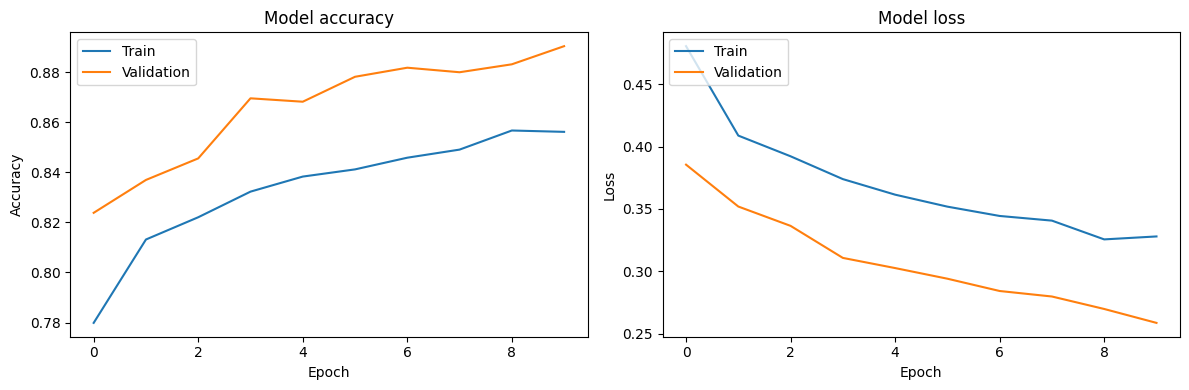

In [32]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(vgg_history.history['accuracy'])
plt.plot(vgg_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(vgg_history.history['loss'])
plt.plot(vgg_history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [33]:
from tensorflow.keras.metrics import Precision, Recall

pre = Precision()
rec = Recall()

for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = vgg_based_model.predict(X)
    pre.update_state(y, yhat)
    rec.update_state(y, yhat)

1/1 [==============================] - 0s 269ms/step


In [34]:
print(f'Precision: {pre.result().numpy()}, Recall: {rec.result().numpy()}')


Precision: 0.8888888955116272, Recall: 0.8714597225189209


In [35]:
from tensorflow.keras.models import load_model
from keras.models import load_model

# Assuming 'model' is your Keras model
vgg_based_model.save('model/ai_imageclassifier', save_format='tf')

loaded_model = tf.keras.models.load_model('model/ai_imageclassifier')

INFO:tensorflow:Assets written to: model/ai_imageclassifier\assets


INFO:tensorflow:Assets written to: model/ai_imageclassifier\assets


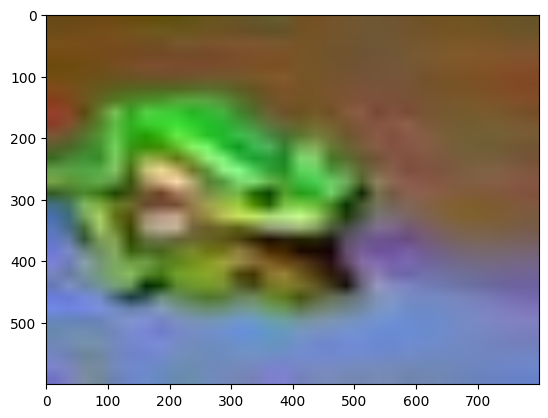

In [36]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = r"D:\## BE Sem II\Project stage II\Cifake Dataset\TEST\FAKE\97 (7).jpg"

try:
    img = cv2.imread(image_path)

    # Check if the image is loaded successfully
    if img is None:
        raise FileNotFoundError(f"Could not read the image from {image_path}")

    # Resize the image to a larger size
    img = cv2.resize(img, (800, 600))

    # Convert from BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the resized image
    plt.imshow(img)
    plt.show()

except Exception as e:
    print(f"Error: {e}")


In [37]:
import numpy as np

In [38]:
resize = tf.image.resize(img, (32, 32))

y_pred = vgg_based_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 373ms/step


In [39]:
y_pred

array([[0.14586462]], dtype=float32)

In [40]:
if y_pred > 0.5: 
    print(f'Predicted class: REAL')
else:
    print(f'Predicted class: SYNTHETIC')

Predicted class: SYNTHETIC


In [41]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Evaluate the model on the test set
y_true = []
y_pred_probs = []

for batch in test.as_numpy_iterator():
    X, y = batch
    y_true.extend(y)
    y_pred_probs.extend(vgg_based_model.predict(X).flatten())


1/1 [==============================] - 0s 262ms/step


In [42]:
# Convert probabilities to binary predictions
y_pred = np.array(y_pred_probs) > 0.5

In [43]:
# Confusion Matrix
conf_mat = confusion_matrix(y_true, y_pred)

In [44]:
# Classification Report
class_report = classification_report(y_true, y_pred, target_names=['SYNTHETIC', 'REAL'])

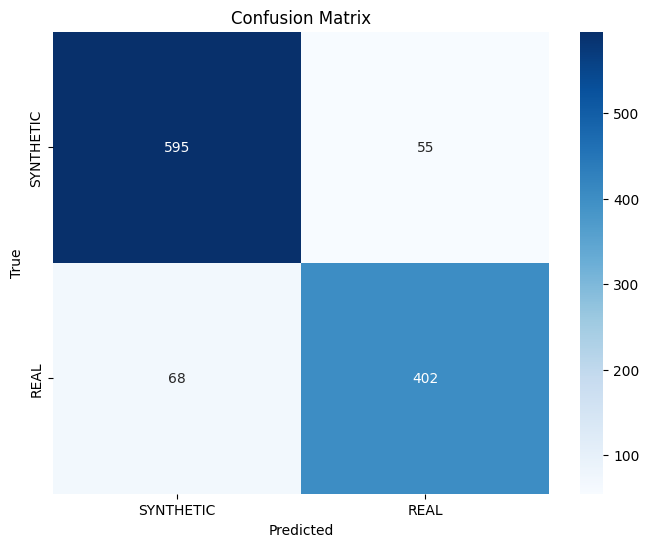

In [45]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['SYNTHETIC', 'REAL'], yticklabels=['SYNTHETIC', 'REAL'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [46]:
# Display Classification Report
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

   SYNTHETIC       0.90      0.92      0.91       650
        REAL       0.88      0.86      0.87       470

    accuracy                           0.89      1120
   macro avg       0.89      0.89      0.89      1120
weighted avg       0.89      0.89      0.89      1120

